# Regressao Linear - Açudes da Paraíba - 2017
# Boqueirão - Com Recarga do Rio São Francisco (Abril/2017)
## http://www.aesa.pb.gov.br/aesa-website/monitoramento/volume-acude/?id_acude=531

In [1]:
import pandas as pd

In [2]:
# leitura do dataset
#
# Acude de Boqueirão com Recarga do Rio São Francisco - 30/04/2017 ate 17/07/2017
df = pd.read_excel(open("boqueirao_com_recarga2.xlsx",'rb'))
df.head()

,Açude,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm)
0,Epitácio Pessoa,20/04/2017,2.92,12033034.63,0
1,Epitácio Pessoa,21/04/2017,2.94,12121496.02,0
2,Epitácio Pessoa,22/04/2017,2.98,12268931.67,0
3,Epitácio Pessoa,23/04/2017,3.02,12445854.45,0
4,Epitácio Pessoa,24/04/2017,3.08,12681751.49,0


In [3]:
#del df["Açude"]
df.head()

,Açude,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm)
0,Epitácio Pessoa,20/04/2017,2.92,12033034.63,0
1,Epitácio Pessoa,21/04/2017,2.94,12121496.02,0
2,Epitácio Pessoa,22/04/2017,2.98,12268931.67,0
3,Epitácio Pessoa,23/04/2017,3.02,12445854.45,0
4,Epitácio Pessoa,24/04/2017,3.08,12681751.49,0


In [4]:
df.tail()

,Açude,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm)
186,Epitácio Pessoa,23/10/2017,9.19,37822922.12,0
187,Epitácio Pessoa,24/10/2017,9.20,37888893.44,0
188,Epitácio Pessoa,25/10/2017,9.22,37954864.76,0
189,Epitácio Pessoa,26/10/2017,9.24,38020836.08,0
190,Epitácio Pessoa,27/10/2017,9.24,38020836.08,0


In [5]:
len(df)

191

In [6]:
# converter atributo para data
df['Data do registro'] =  pd.to_datetime( df['Data do registro'], format="%d/%m/%Y") 
df.head()

,Açude,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm)
0,Epitácio Pessoa,2017-04-20,2.92,12033034.63,0
1,Epitácio Pessoa,2017-04-21,2.94,12121496.02,0
2,Epitácio Pessoa,2017-04-22,2.98,12268931.67,0
3,Epitácio Pessoa,2017-04-23,3.02,12445854.45,0
4,Epitácio Pessoa,2017-04-24,3.08,12681751.49,0


In [7]:
# colocar a data como indice para fazer uma série temporal
df2 = df.set_index(pd.DatetimeIndex(df['Data do registro']))
#del df2['Data do registro']
df2.head()

,Açude,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm)
Data do registro,,,,,
2017-04-20,Epitácio Pessoa,2017-04-20,2.92,12033034.63,0
2017-04-21,Epitácio Pessoa,2017-04-21,2.94,12121496.02,0
2017-04-22,Epitácio Pessoa,2017-04-22,2.98,12268931.67,0
2017-04-23,Epitácio Pessoa,2017-04-23,3.02,12445854.45,0
2017-04-24,Epitácio Pessoa,2017-04-24,3.08,12681751.49,0


In [8]:
del df2["Açude"]
df2.describe()

,Volume (%),Volume (m³),Volume de chuvas (mm)
count,191.000000,1.910000e+02,191.0
mean,7.010838,2.886356e+07,0.0
std,1.765409,7.267466e+06,0.0
min,2.920000,1.203303e+07,0.0
25%,5.870000,2.417893e+07,0.0
50%,7.550000,3.107757e+07,0.0
75%,8.440000,3.475526e+07,0.0
max,9.240000,3.802084e+07,0.0


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 191 entries, 2017-04-20 to 2017-10-27
Data columns (total 4 columns):
Data do registro         191 non-null datetime64[ns]
Volume (%)               191 non-null float64
Volume (m³)              191 non-null float64
Volume de chuvas (mm)    191 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 7.5 KB


In [10]:
#del df2["Açude"]
#del df2["Data do registro"]
df2.head()

,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm)
Data do registro,,,,
2017-04-20,2017-04-20,2.92,12033034.63,0
2017-04-21,2017-04-21,2.94,12121496.02,0
2017-04-22,2017-04-22,2.98,12268931.67,0
2017-04-23,2017-04-23,3.02,12445854.45,0
2017-04-24,2017-04-24,3.08,12681751.49,0


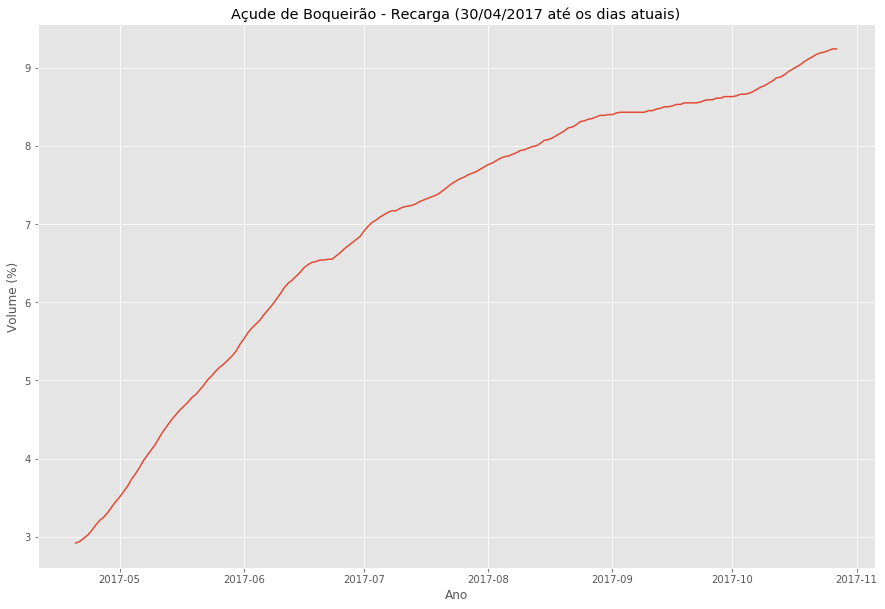

In [11]:
import matplotlib, matplotlib.pyplot as plt

matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))
plt.plot(df2["Volume (%)"])
# adcionando textos
plt.title("Açude de Boqueirão - Recarga (30/04/2017 até os dias atuais)")
plt.xlabel("Ano")
plt.ylabel("Volume (%)")
plt.savefig("Boqueirao-recarga-01.pdf")

plt.show()

In [12]:
# criar uma coluna com os dias
df3 = df2
numero_de_dias_observados = len(df3)
df3["dia"] = range(1,numero_de_dias_observados+1)
df3.head()

,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm),dia
Data do registro,,,,,
2017-04-20,2017-04-20,2.92,12033034.63,0,1
2017-04-21,2017-04-21,2.94,12121496.02,0,2
2017-04-22,2017-04-22,2.98,12268931.67,0,3
2017-04-23,2017-04-23,3.02,12445854.45,0,4
2017-04-24,2017-04-24,3.08,12681751.49,0,5


In [13]:
print("numero_de_dias_observados = ",len(df3)) # numero de tuplas ou linhas ou medições

numero_de_dias_observados =  191


In [14]:
df3.tail()

,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm),dia
Data do registro,,,,,
2017-10-23,2017-10-23,9.19,37822922.12,0,187
2017-10-24,2017-10-24,9.20,37888893.44,0,188
2017-10-25,2017-10-25,9.22,37954864.76,0,189
2017-10-26,2017-10-26,9.24,38020836.08,0,190
2017-10-27,2017-10-27,9.24,38020836.08,0,191


In [15]:
# Preparar os dados para aplicar o modelo de regressao
import numpy, pandas as pd
import matplotlib, matplotlib.pyplot as plt
import sklearn.linear_model as lm
import warnings
warnings.filterwarnings('ignore')

df3.head()

,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm),dia
Data do registro,,,,,
2017-04-20,2017-04-20,2.92,12033034.63,0,1
2017-04-21,2017-04-21,2.94,12121496.02,0,2
2017-04-22,2017-04-22,2.98,12268931.67,0,3
2017-04-23,2017-04-23,3.02,12445854.45,0,4
2017-04-24,2017-04-24,3.08,12681751.49,0,5


In [16]:
# Aplicar o modelo de Regressao
olm = lm.LinearRegression()
#X = numpy.array([x.toordinal() for x in df3.index])[:, numpy.newaxis]
X = df3['dia'].values.reshape(-1, 1)
y = df3['Volume (%)']
olm.fit(X, y)

# Predict values
#yp = [olm.predict(x.toordinal())[0] for x in df3.index]
yp = olm.predict(df3['dia'].values.reshape(-1, 1))

# Evaluate the model
olm_score = olm.score(X, y)
olm_score

0.91076026228963225

In [17]:
X[:3]

array([[1],
       [2],
       [3]])

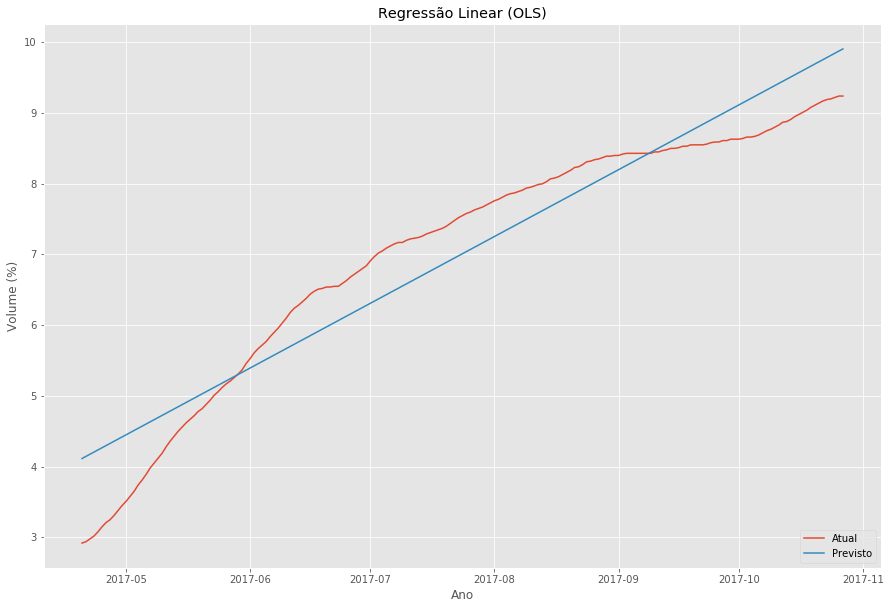

In [18]:
# Plota os dados
my_dpi=96
#plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
plt.figure( dpi=100)
%matplotlib inline
matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))

# Plot both data sets
plt.plot(df3.index, y)
plt.plot(df3.index, yp)

# Add decorations
plt.title("Regressão Linear (OLS)")
plt.xlabel("Ano")
plt.ylabel("Volume (%)")
plt.legend(["Atual", "Previsto"], loc="lower right")
path="/Users/vladimiralencar/Dropbox/Slides-DataScienceUEPB-2017/Praticas/python/acudes"
#plt.savefig(path + "/BoqueiraoComRecarga.pdf")
plt.show()

### preparando a saida para plotar

In [19]:
# a reta de regressao
a = olm.coef_[0]
b = olm.intercept_
print(' y = {0} * x + {1}'.format(a, b))

 y = 0.030476887572333994 * x + 4.085056489391015


 y = 0.030476887572333994 * x + 4.085056489391015


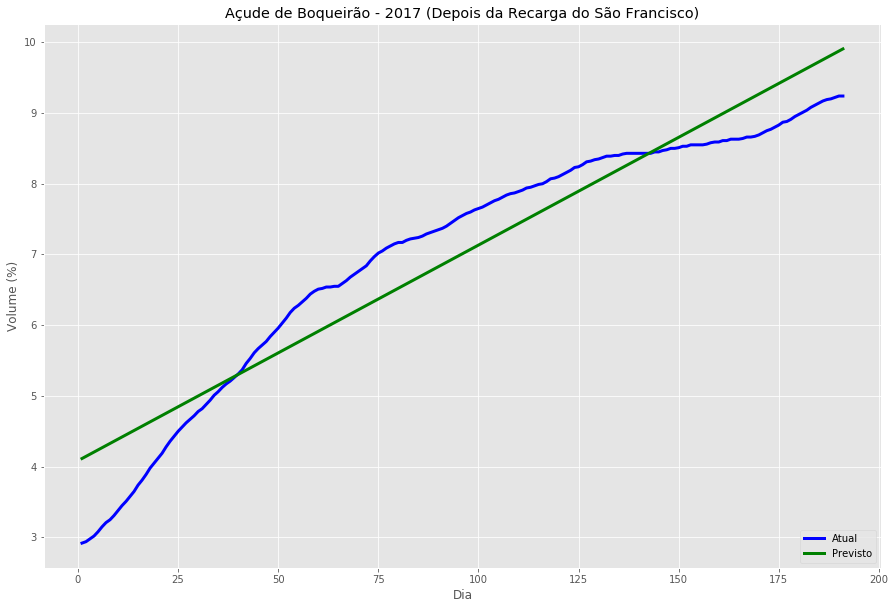

In [20]:
# Plot outputs
matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))

# Plot both data sets
#plt.scatter(X_test, Y_test,  color='black')
plt.plot(X, y, color='blue',
         linewidth=3)
plt.plot(X, olm.predict(X), color='green',
         linewidth=3)

# Add decorations
plt.title("Açude de Boqueirão - 2017 (Depois da Recarga do São Francisco)")
plt.xlabel("Dia")
plt.ylabel("Volume (%)")
plt.legend(["Atual", "Previsto",], loc="lower right")
path="/Users/vladimiralencar/Dropbox/Slides-DataScienceUEPB-2017/Praticas/python/acudes"
#plt.savefig(path + "/BoqueiraoComRecarga.pdf")
print(' y = {0} * x + {1}'.format(a, b))
plt.show()

In [21]:
list(olm.predict(X))[:3]

[4.1155333769633486, 4.1460102645356827, 4.1764871521080167]

In [22]:
import numpy as np

In [23]:
dados3meses = np.array(numero_de_dias_observados + 90) 
dados3meses

array(281)

In [24]:
olm.predict(dados3meses)[0]

12.649061897216868

In [25]:
# predicao para 1 ano
dados = np.array(numero_de_dias_observados + 365)
pred = olm.predict(dados)[0] 

print ("Volume Boqueirão depois de um ano = %6.2f %%" % (pred))

Volume Boqueirão depois de um ano =  21.03 %


In [26]:
# predicao para 2 anos
dados = np.array((numero_de_dias_observados+365)*2).reshape(1, -1)
pred = olm.predict(dados)[0]  

print ("Volume Boqueirão depois de dois anos = %6.2f %%" % (pred))

Volume Boqueirão depois de dois anos =  37.98 %


In [27]:
# predicao até verter água-sangrar

ano = 1
while (True):
    anopred = np.array([365*ano]).reshape(1, -1)
    pred = olm.predict(numero_de_dias_observados + anopred)[0]  
    if pred > 100:
        break
    print ("Volume Boqueirão depois de %d ano(s) -> %-5.2f%%" % (ano,pred))
    ano = ano + 1

Volume Boqueirão depois de 1 ano(s) -> 21.03%
Volume Boqueirão depois de 2 ano(s) -> 32.15%
Volume Boqueirão depois de 3 ano(s) -> 43.28%
Volume Boqueirão depois de 4 ano(s) -> 54.40%
Volume Boqueirão depois de 5 ano(s) -> 65.53%
Volume Boqueirão depois de 6 ano(s) -> 76.65%
Volume Boqueirão depois de 7 ano(s) -> 87.77%
Volume Boqueirão depois de 8 ano(s) -> 98.90%
